# Effect of LSD and music experience on brain states during resting state (6 states) #

This notebook is used for analysis of the effect of LSD and music experience on brain states during resting state.

We calculate states' measures:
1) fractional occupancy 
2) dwell time 
3) transition probability 

Then, for each of these mesures we perform KS-tests to check if variables have a normal distirubtion. If so, we use t-test to test out hypothesis, otherise we use permutation non-parametric test.

Number of states = 8

**Last update:** 04.08.2022

### Step 0: Loading libraries ####

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from nilearn import plotting
from nilearn.plotting import plot_matrix
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, norm, kstest
%matplotlib inline
!pip install mlxtend 
from mlxtend.evaluate import permutation_test

### Step 1: Loading data ####

In [2]:
#Loading all data
df_merge = pd.read_csv('data/8_states/8_df_merge.csv')
data_r1_r3 = df_merge[df_merge['Run'] != 2]

### Step 2: Plotting fractional occupancy for run 1 (resting state) and run 3 (resting state) ###

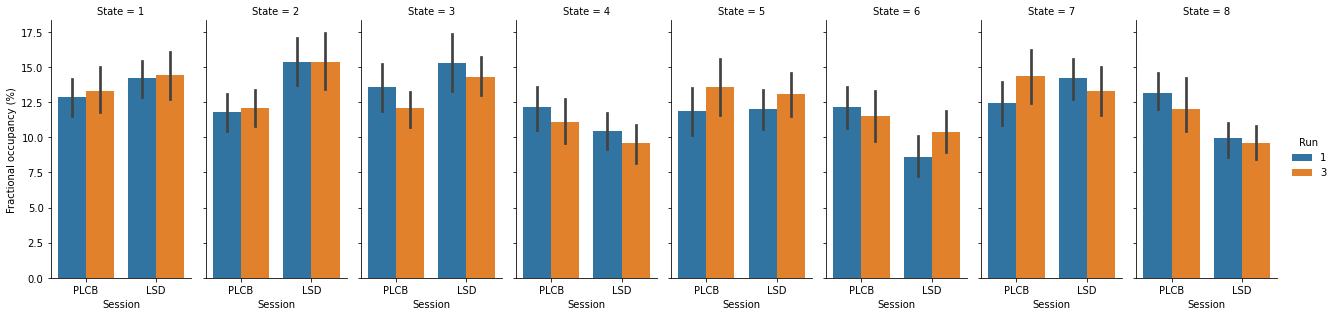

In [3]:
sns.catplot(x = 'Session', y = 'Fractional occupancy (%)', hue = 'Run', col = 'State', kind = 'bar', data = data_r1_r3,  height=4.5, aspect=0.5)
plt.savefig('Figures/fo_run13.png', dpi=300, bbox_inches='tight')

### Step 3: Plotting dwell time for run 1 (resting state) and run 3 (resting state) ###

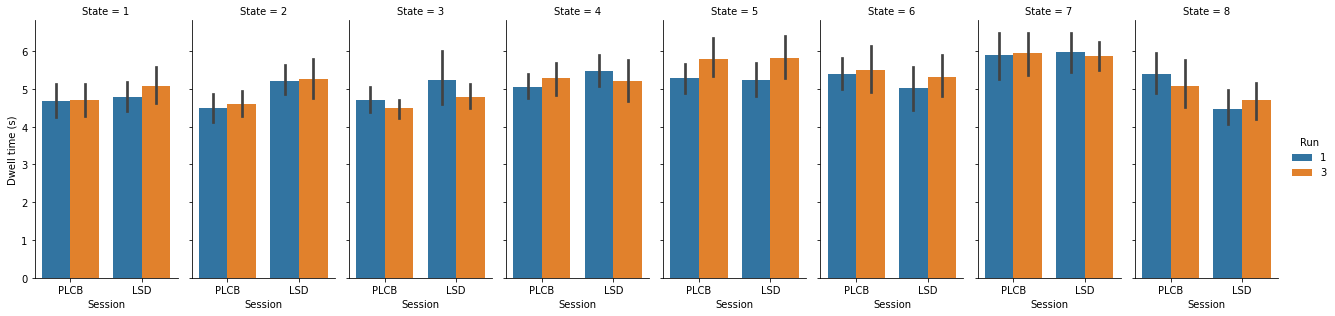

In [4]:
sns.catplot(x = 'Session', y = 'Dwell time (s)', hue = 'Run', col = 'State', kind = 'bar', data = data_r1_r3,  height=4.5, aspect=0.5)
plt.savefig('Figures/dt_run13.png', dpi=300, bbox_inches='tight')

## **Fractional occupancy analysis** ##

### Step 4: Performing t-test for each state for fractional occupancy (run 1 vs run 3 for each session) ###

In [5]:
#Selecting states and sessions

sessions = ['PLCB', 'LSD']

iterator = np.arange(8) 

#Iterating over states and sessions
for i in iterator:
    for j in sessions:
        fo_state = data_r1_r3[(data_r1_r3['State'] == i+1) & (data_r1_r3['Session'] == j)]
        fo_run1 = []
        fo_run3 = []
        for index, row in fo_state.iterrows():
            if row['Run'] == 1:
                fo_run1.append(row['Fractional occupancy (%)'])
            else:
                fo_run3.append(row['Fractional occupancy (%)'])
                
        stat_t, pval_t = ttest_rel(fo_run1, fo_run3) #Calculating paired t-test
        print(f'Paired T-test for state {i+1}, session {j} | statistics: {stat_t}, p-value: {pval_t}')
        print('')

Paired T-test for state 1, session PLCB | statistics: -0.42152552141429794, p-value: 0.6797718462273852

Paired T-test for state 1, session LSD | statistics: -0.3164161650600723, p-value: 0.756355214770855

Paired T-test for state 2, session PLCB | statistics: -0.26896047742064066, p-value: 0.7918831923569531

Paired T-test for state 2, session LSD | statistics: 3.31594825643339e-16, p-value: 0.9999999999999998

Paired T-test for state 3, session PLCB | statistics: 1.7049280515660914, p-value: 0.1102876996922966

Paired T-test for state 3, session LSD | statistics: 1.014978367512883, p-value: 0.3273369919396466

Paired T-test for state 4, session PLCB | statistics: 0.8624688162573733, p-value: 0.4029621127081855

Paired T-test for state 4, session LSD | statistics: 1.2373573070502035, p-value: 0.23630692460864886

Paired T-test for state 5, session PLCB | statistics: -1.6356344527953657, p-value: 0.12419161990561671

Paired T-test for state 5, session LSD | statistics: -1.1602387022306

### Step 5: Performing t-test for each state for fractional occupancy (difference between run 3 and run 1) ###

In [6]:
#Iterating over states and sessions
for i in iterator:
    diff_list = []
    for j in sessions:
        fo_state = data_r1_r3[(data_r1_r3['State'] == i+1) & (data_r1_r3['Session'] == j)]
        fo_run1 = []
        fo_run3 = []
        
        for index, row in fo_state.iterrows():
            if row['Run'] == 1:
                fo_run1.append(row['Fractional occupancy (%)'])
            else:
                fo_run3.append(row['Fractional occupancy (%)'])
                
        diff = np.array(fo_run3) - np.array(fo_run1) #Calculating the difference between run 3 and run 1
        diff_list.append(diff)
        
    stat_t, pval_t = ttest_rel(diff_list[0], diff_list[1]) #Calculating paired t-test
    print(f'Paired T-test for state {i+1} | statistics: {stat_t}, p-value: {pval_t}')
    print('')

Paired T-test for state 1 | statistics: 0.15362986503704587, p-value: 0.880094085970069

Paired T-test for state 2 | statistics: 0.162801016143157, p-value: 0.8730016583810258

Paired T-test for state 3 | statistics: -0.483101615816413, p-value: 0.6364911397435609

Paired T-test for state 4 | statistics: -0.16571045299983259, p-value: 0.8707540063229874

Paired T-test for state 5 | statistics: 0.4819427021399925, p-value: 0.6372937759946109

Paired T-test for state 6 | statistics: -1.4285755360164396, p-value: 0.17505600789083559

Paired T-test for state 7 | statistics: 2.24869460169145, p-value: 0.04115506966833975

Paired T-test for state 8 | statistics: -0.8119904003122494, p-value: 0.4303877777685299



### Step 6: Performing t-test for run 3 for fractional occupancy (placebo vs LSD for each run) ###

In [7]:
#Selecting runs
runs = [3]

#Iterating over states and runs
for i in iterator:
    fo_plcb = []
    fo_lsd = []
    for j in runs:
        fo_run = data_r1_r3[data_r1_r3['Run'] == j]
        for index, row in fo_run.iterrows():
            if row['State'] == i+1:
                if row['Session'] == 'PLCB':
                    fo_plcb.append(row['Fractional occupancy (%)'])
                else:
                    fo_lsd.append(row['Fractional occupancy (%)'])
                    
        stat_t, pval_t = ttest_rel(fo_plcb, fo_lsd) #Calculating paired t-test
        print(f'Paired T-test for run {j}, state {i+1}| statistics: {stat_t}, p-value: {pval_t}')
        print('')

Paired T-test for run 3, state 1| statistics: -0.84212169454304, p-value: 0.4138746901405007

Paired T-test for run 3, state 2| statistics: -2.5082388514498235, p-value: 0.025064392085934348

Paired T-test for run 3, state 3| statistics: -2.1482626539532093, p-value: 0.0496774807984849

Paired T-test for run 3, state 4| statistics: 1.3878948316934885, p-value: 0.18686215715114993

Paired T-test for run 3, state 5| statistics: 0.3675214049766382, p-value: 0.7187265303074715

Paired T-test for run 3, state 6| statistics: 0.8870799416034635, p-value: 0.39002074722195157

Paired T-test for run 3, state 7| statistics: 0.8551861104941368, p-value: 0.4068458237272484

Paired T-test for run 3, state 8| statistics: 2.496060786993653, p-value: 0.025661181846384207



## **Dwell time analysis** ##

### Step 7: Performing t-test for each state for dwell time (run 1 vs run 3 for each session) ###

In [8]:
#Iterating over states and sessions
for i in iterator:
    for j in sessions:
        dt_state = data_r1_r3[(data_r1_r3['State'] == i+1) & (data_r1_r3['Session'] == j)]
        dt_run1 = []
        dt_run3 = []
        for index, row in dt_state.iterrows():
            if row['Run'] == 1:
                dt_run1.append(row['Dwell time (s)'])
            else:
                dt_run3.append(row['Dwell time (s)'])
                
        stat_t, pval_t = ttest_rel(dt_run1, dt_run3) #Calculating paired t-test
        print(f'Paired T-test for state {i+1}, session {j} | statistics: {stat_t}, p-value: {pval_t}')
        print('')

Paired T-test for state 1, session PLCB | statistics: -0.0410335000016236, p-value: 0.9678486390334115

Paired T-test for state 1, session LSD | statistics: -0.9121848098782883, p-value: 0.37711178522977107

Paired T-test for state 2, session PLCB | statistics: -0.41272936348822503, p-value: 0.6860560655975779

Paired T-test for state 2, session LSD | statistics: -0.13730490116898514, p-value: 0.8927449171900828

Paired T-test for state 3, session PLCB | statistics: 1.2016736674437347, p-value: 0.24942391774000608

Paired T-test for state 3, session LSD | statistics: 1.0917734524441982, p-value: 0.29336555543971465

Paired T-test for state 4, session PLCB | statistics: -0.8828664784041702, p-value: 0.3922162416735787

Paired T-test for state 4, session LSD | statistics: 0.7981179210294373, p-value: 0.4381313685130368

Paired T-test for state 5, session PLCB | statistics: -2.002899338521858, p-value: 0.0649437158492047

Paired T-test for state 5, session LSD | statistics: -2.09168061242

### Step 8: Performing t-test for each state for dwell time (difference between run 3 and run 1) ###

In [9]:
for i in iterator:
    diff_list = []
    for j in sessions:
        dt_state = data_r1_r3[(data_r1_r3['State'] == i+1) & (data_r1_r3['Session'] == j)]
        dt_run1 = []
        dt_run3 = []
        for index, row in dt_state.iterrows():
            if row['Run'] == 1:
                dt_run1.append(row['Dwell time (s)'])
            else:
                dt_run3.append(row['Dwell time (s)'])
                
        diff = np.array(dt_run3) - np.array(dt_run1)
        diff_list.append(diff)
        
    stat_t, pval_t = ttest_rel(diff_list[0], diff_list[1]) #Calculating paired t-test
    print(f'Paired T-test for state {i+1} | statistics: {stat_t}, p-value: {pval_t}')
    print('')

Paired T-test for state 1 | statistics: -0.6399088431375364, p-value: 0.5325648660651772

Paired T-test for state 2 | statistics: 0.15321268317210823, p-value: 0.8804169688777184

Paired T-test for state 3 | statistics: 0.5192959290985412, p-value: 0.6116661726292228

Paired T-test for state 4 | statistics: 1.6833371995666322, p-value: 0.11446654214890435

Paired T-test for state 5 | statistics: -0.2676092699692464, p-value: 0.7929022771065609

Paired T-test for state 6 | statistics: -0.39322183023068114, p-value: 0.700078523360966

Paired T-test for state 7 | statistics: 0.30146126355796826, p-value: 0.7674940779319435

Paired T-test for state 8 | statistics: -0.8921700765515619, p-value: 0.38737953028023553



### Step 9: Performing t-test for run 3 for dwell time (placebo vs LSD for each run) ###

In [10]:
runs = [3]

#Iterating over states and runs
for i in iterator:
    dt_plcb = []
    dt_lsd = []
    for j in runs:
        dt_run = data_r1_r3[data_r1_r3['Run'] == j]
        for index, row in dt_run.iterrows():
            if row['State'] == i+1:
                if row['Session'] == 'PLCB':
                    dt_plcb.append(row['Dwell time (s)'])
                else:
                    dt_lsd.append(row['Dwell time (s)'])
                    
        stat_t, pval_t = ttest_rel(dt_plcb, dt_lsd) #Calculating paired t-test
        print(f'Paired T-test for run {j}, state {i+1}| statistics: {stat_t}, p-value: {pval_t}')
        print('')

Paired T-test for run 3, state 1| statistics: -1.0805560538238606, p-value: 0.2981580212961435

Paired T-test for run 3, state 2| statistics: -1.6200077602069054, p-value: 0.12752939847179356

Paired T-test for run 3, state 3| statistics: -1.4016744582671032, p-value: 0.1827918989142196

Paired T-test for run 3, state 4| statistics: 0.1779452381356849, p-value: 0.8613150718888569

Paired T-test for run 3, state 5| statistics: -0.09444357482724568, p-value: 0.9260952060577321

Paired T-test for run 3, state 6| statistics: 0.5056821336212969, p-value: 0.6209478801162818

Paired T-test for run 3, state 7| statistics: 0.22988786720495755, p-value: 0.8215038294084551

Paired T-test for run 3, state 8| statistics: 0.8819608348432901, p-value: 0.3926892266504788



## **Transition probability analysis** ##

### Step 10: Loading data ###

In [3]:
#Loading all data
bs_all = np.load('data/fixed_brain_states_reshaped.npy', allow_pickle = True).item()

#Loading data for each session (placebo / LSD) and run (rest 1 / rest 2 )
bs_plcb_run1 = bs_all['PLCB']['run_1'][6,:,:]
bs_plcb_run3 = bs_all['PLCB']['run_3'][6,:,:]

bs_lsd_run1 = bs_all['LSD']['run_1'][6,:,:]
bs_lsd_run3 = bs_all['LSD']['run_3'][6,:,:]

### Step 11: Calculating transition probability for placebo session ###

In [4]:
states_no = 8

plcb_all = [bs_plcb_run1, bs_plcb_run3]
state_transitions_plcb = np.zeros((bs_plcb_run1.shape[0], 2, states_no, states_no))

for s, bs in enumerate(plcb_all):
    for sub in range(bs.shape[0]):   
            for i in range(states_no):
                for j in range(states_no):
                    count = 0
                    for l in range(bs.shape[1]-1):
                        if bs[sub, l] == i and bs[sub, l+1] == j:
                            count += 1
                            p = count/np.unique(bs[sub, :], return_counts=True)[1][i] #Calculating transition probability
                    state_transitions_plcb[sub, s, i, j] = p
                    
np.save('data/8_states/state_transitions_plcb_2.npy', state_transitions_plcb)

### Step 12: KS-test for transition probability for placebo session run 1 & 3 ###

#### Step 12.1: KS-test for transition probability, placebo session run 1

KS-test for transition probability, placebo session, run 1: statistics 0.3084694199959301, p-value 1.306918060408886e-81


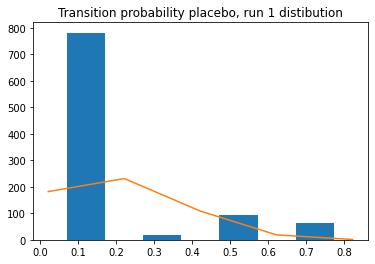

In [13]:
plcb_run1 = state_transitions_plcb[:,0,:,:]

p1_trans1 = np.concatenate(plcb_run1, axis = 0)
plcb1 = np.concatenate(p1_trans1, axis = 0)

p1_loc, p1_scale = norm.fit(plcb1)
n1 = norm(loc=p1_loc, scale=p1_scale)
p1_stat, p1_pval = kstest(plcb1, n1.cdf)
print(f'KS-test for transition probability, placebo session, run 1: statistics {p1_stat}, p-value {p1_pval}')

plt.hist(plcb1, bins=np.arange(plcb1.min(), plcb1.max()+0.2, 0.2), rwidth=0.5)
p1_x = np.arange(plcb1.min(), plcb1.max()+0.2, 0.2)
plt.plot(p1_x, 120*n1.pdf(p1_x))
plt.title('Transition probability placebo, run 1 distibution')
plt.show()

#### Step 12.2: KS-test for transition probability, placebo session run 3

KS-test for transition probability, placebo session, run 3: statistics 0.31992051706699054, p-value 6.725816352823332e-88


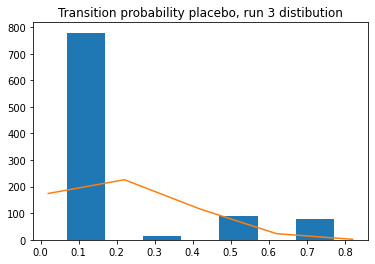

In [14]:
plcb_run3 = state_transitions_plcb[:,1,:,:]

p3_trans1 = np.concatenate(plcb_run3, axis = 0)
plcb3 = np.concatenate(p3_trans1, axis = 0)

p3_loc, p3_scale = norm.fit(plcb3)
n3 = norm(loc=p3_loc, scale=p3_scale)
p3_stat, p3_pval = kstest(plcb3, n3.cdf)
print(f'KS-test for transition probability, placebo session, run 3: statistics {p3_stat}, p-value {p3_pval}')

plt.hist(plcb3, bins=np.arange(plcb3.min(), plcb3.max()+0.2, 0.2), rwidth=0.5)
p3_x = np.arange(plcb3.min(), plcb3.max()+0.2, 0.2)
plt.plot(p3_x, 120*n3.pdf(p3_x))
plt.title('Transition probability placebo, run 3 distibution')
plt.show()

### Step 13: Performing permutation test for placebo session between run 1 and run 3 ###

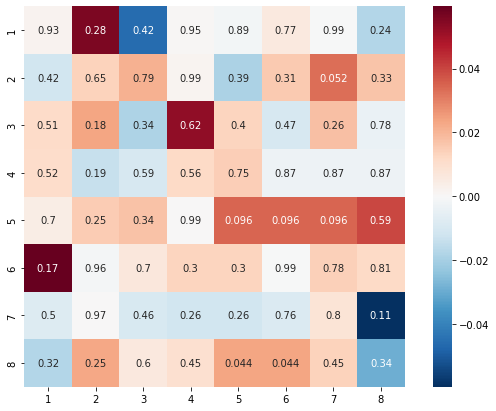

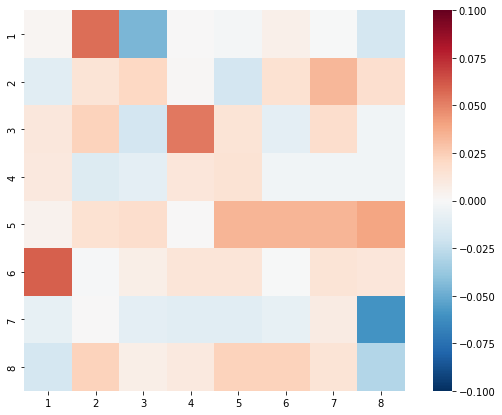

In [12]:
#Creating empty matrices to store the data
plcb_mm_diff_mean = np.zeros((8,8))
plcb_mm_pval = np.zeros((8,8))

#Calculating mean difference and p-value
for i in range(8):
    for j in range(8):
        diff_mean = np.mean(state_transitions_plcb[:,1,i,j] - state_transitions_plcb[:,0,i,j])
        plcb_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(state_transitions_plcb[:,1,i,j], state_transitions_plcb[:,0,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        plcb_mm_pval[i,j] = round(p_value, 10)
        
#Plotting statistics
plt.figure(figsize=(10,7))
plcb_ttest = sns.heatmap(plcb_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = plcb_mm_pval[:, :], xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8])
plt.savefig(f'Figures/8_states/tp_plcb_run13_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
plcb_ttest = sns.heatmap(plcb_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8], vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/8_states/tp_plcb_run13.png', dpi=300, bbox_inches='tight')

### Step 14: Calculating transition probability for LSD session ###

In [6]:
lsd_all = [bs_lsd_run1, bs_lsd_run3]
state_transitions_lsd = np.zeros((bs_lsd_run1.shape[0], 2, states_no, states_no))


for s, bs in enumerate(lsd_all):
    for sub in range(bs.shape[0]):   
            for i in range(states_no):
                for j in range(states_no):
                    count = 0
                    for l in range(bs.shape[1]-1):
                        if bs[sub, l] == i and bs[sub, l+1] == j:
                            count += 1
                            p = count/np.unique(bs[sub, :], return_counts=True)[1][i] #Calculating transition probability
                    state_transitions_lsd[sub, s, i, j] = p
                    
np.save('data/8_states/state_transitions_lsd_2.npy', state_transitions_lsd)

### Step 15: KS-test for transition probability for LSD session run 1 & 3 ###

#### Step 15.1: KS-test transition probability LSD session run 1 #####

KS-test for transition probability, LSD session, run 1: statistics 0.29054998716257263, p-value 2.8535045658152587e-72


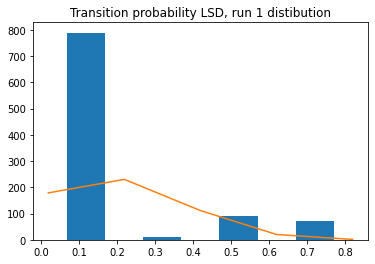

In [17]:
lsd_run1 = state_transitions_lsd[:,0,:,:]

l1_trans1 = np.concatenate(lsd_run1, axis = 0)
lsd1 = np.concatenate(l1_trans1, axis = 0)

l1_loc, l1_scale = norm.fit(lsd1)
n1 = norm(loc=l1_loc, scale=l1_scale)
l1_stat, l1_pval = kstest(lsd1, n1.cdf)
print(f'KS-test for transition probability, LSD session, run 1: statistics {l1_stat}, p-value {l1_pval}')

plt.hist(lsd1, bins=np.arange(lsd1.min(), lsd1.max()+0.2, 0.2), rwidth=0.5)
l1_x = np.arange(lsd1.min(), lsd1.max()+0.2, 0.2)
plt.plot(l1_x, 120*n1.pdf(l1_x))
plt.title('Transition probability LSD, run 1 distibution')
plt.show()

#### Step 15.2: KS-test transition probability LSD session run 3 ####

KS-test for transition probability, LSD session, run 3: statistics 0.31469436610754076, p-value 5.357762212220858e-85


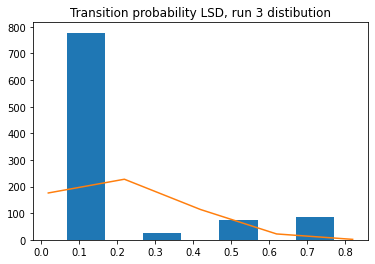

In [18]:
lsd_run3 = state_transitions_lsd[:,1,:,:]

l3_trans1 = np.concatenate(lsd_run3, axis = 0)
lsd3 = np.concatenate(l3_trans1, axis = 0)

l3_loc, l3_scale = norm.fit(lsd3)
n3 = norm(loc=l3_loc, scale=l3_scale)
l3_stat, l3_pval = kstest(lsd3, n3.cdf)
print(f'KS-test for transition probability, LSD session, run 3: statistics {l3_stat}, p-value {l3_pval}')

plt.hist(lsd3, bins=np.arange(lsd3.min(), lsd3.max()+0.2, 0.2), rwidth=0.5)
l3_x = np.arange(lsd3.min(), lsd3.max()+0.2, 0.2)
plt.plot(l3_x, 120*n3.pdf(l3_x))
plt.title('Transition probability LSD, run 3 distibution')
plt.show()

### Step 16: Performing permutation for LSD session between run 1 and run 3 ###

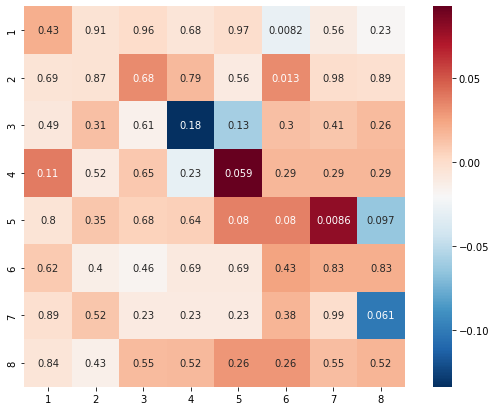

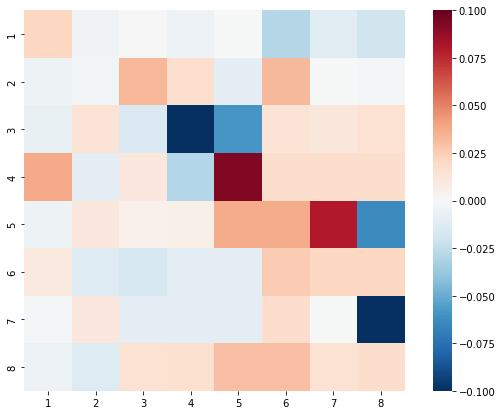

In [14]:
#Creating empty matrices to store the data
lsd_mm_diff_mean = np.zeros((8,8))
lsd_mm_pval = np.zeros((8,8))

#Calculating mean difference and p-value
for i in range(8):
    for j in range(8):
        diff_mean = np.mean(state_transitions_lsd[:,1,i,j] - state_transitions_lsd[:,0,i,j])
        lsd_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(state_transitions_lsd[:,1,i,j], state_transitions_lsd[:,0,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        lsd_mm_pval[i,j] = round(p_value, 10)
        
#Plotting statistics
plt.figure(figsize=(10,7))
lsd_ttest = sns.heatmap(lsd_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = lsd_mm_pval[:, :], xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8])
plt.savefig(f'Figures/8_states/tp_lsd_run13_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
lsd_ttest = sns.heatmap(lsd_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8], vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/8_states/tp_lsd_run13.png', dpi=300, bbox_inches='tight')

### Step 17: Performing permutation test for run 3 between LSD and placebo session ###

In [16]:
#Creating empty matrices to store the data
run3_mm_diff_mean = np.zeros((8,8))
run3_mm_pval = np.zeros((8,8))

#Calculating mean difference and p-value
for i in range(8):
    for j in range(8):
        diff_mean = np.mean(state_transitions_lsd[:,1,i,j] - state_transitions_plcb[:,1,i,j])
        run3_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(state_transitions_lsd[:,1,i,j], state_transitions_plcb[:,1,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        run3_mm_pval[i,j] = round(p_value, 10)
        
#Plotting statistics
plt.figure(figsize=(10,7))
run2_ttest = sns.heatmap(run3_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = run3_mm_pva[:, :], xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8])
plt.savefig(f'Figures/8_states/tp_lsd-plcb_run3_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
run2_ttest = sns.heatmap(run3_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8], vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/8_states/tp_lsd-plcb_run3.png', dpi=300, bbox_inches='tight')

NameError: name 'run3_mm_pva' is not defined

<Figure size 720x504 with 0 Axes>

### Step 18: Performing permutation test for differences in both sessions between run 3 and run 1 ###

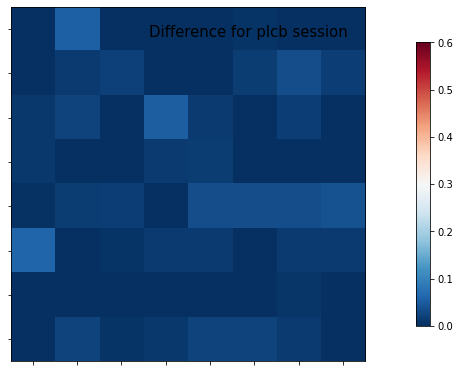

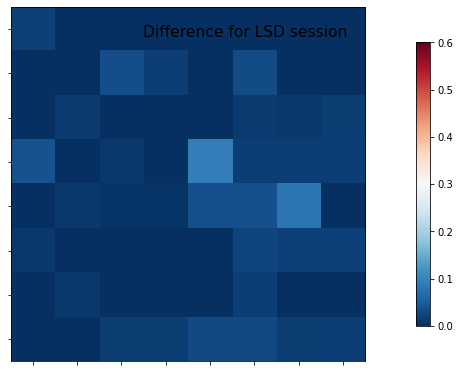

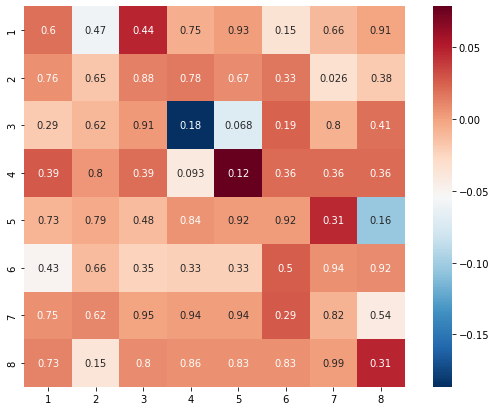

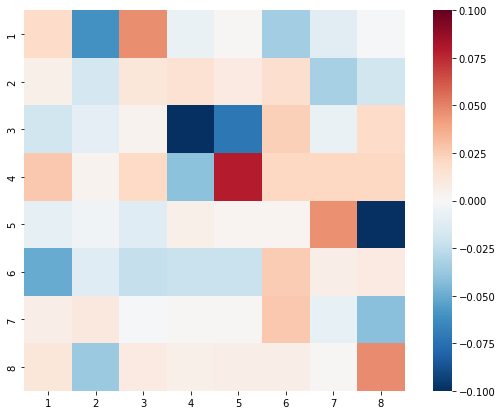

In [18]:
#Calculating difference for placebo session
plcb_difference = state_transitions_plcb[:,1,:,:] - state_transitions_plcb[:,0,:,:]

#Calculating difference for LSD session
lsd_difference = state_transitions_lsd[:,1,:,:] - state_transitions_lsd[:,0,:,:]

plot_matrix(plcb_difference.mean(axis=0), title = 'Difference for plcb session', vmin = 0.0, vmax=0.6)
plot_matrix(lsd_difference.mean(axis=0), title = 'Difference for LSD session', vmin = 0.0, vmax=0.6)


#Creating empty matrices to store the data
diff_mm_diff_mean = np.zeros((8,8))
diff_mm_pval = np.zeros((8,8))

#Calculating mean difference and p-value
for i in range(8):
    for j in range(8):
        diff_mean = np.mean(lsd_difference[:,i,j] - plcb_difference[:,i,j])
        diff_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(lsd_difference[:,i,j], plcb_difference[:,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        diff_mm_pval[i,j] = round(p_value, 10)
        
#Plotting statistics
plt.figure(figsize=(10,7))
diff_ttest = sns.heatmap(diff_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = diff_mm_pval[:, :], xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8])
plt.savefig(f'Figures/8_states/tp_lsd-plcb_diff_run13_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
diff_ttest = sns.heatmap(diff_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8], vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/8_states/tp_lsd-plcb_diff_run13.png', dpi=300, bbox_inches='tight')